# Minor Project

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data

In [3]:
data = pd.read_csv("StudentsPerformance (1).csv")

Understanding the data

In [4]:
data.shape

(1000, 8)

In [5]:
#Gives you the sample of data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
#column info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Let's start with plotting distribution graphs

The distribution of scores of Maths, Reading and Writing are:

Text(0.5, 1.0, 'Math Score')

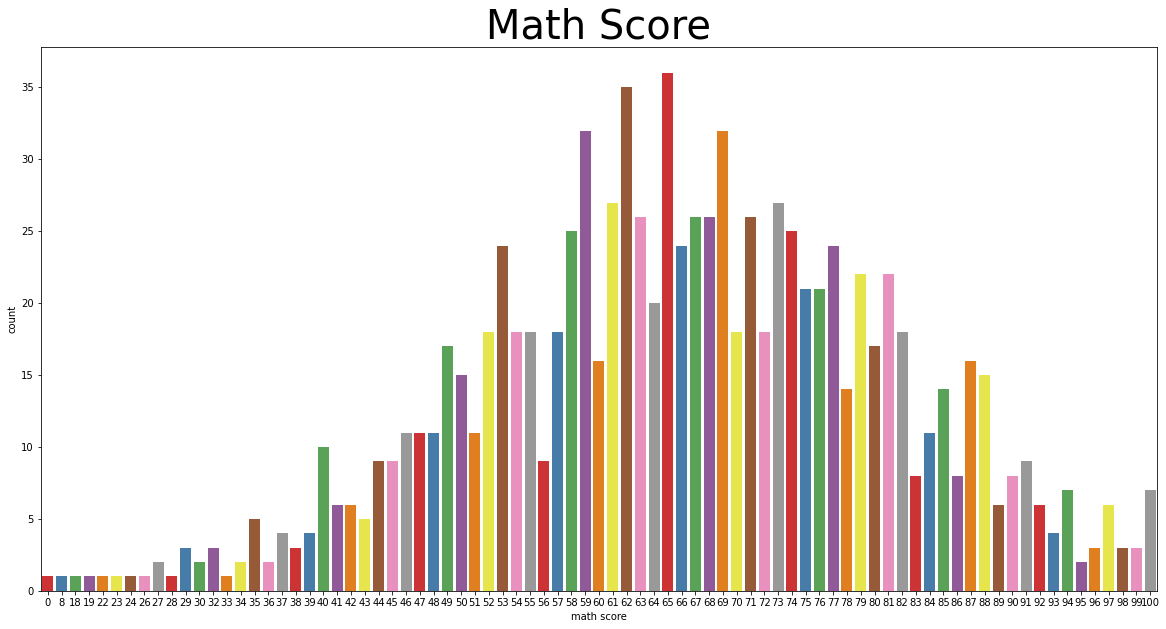

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(data['math score'],palette='Set1')
plt.title('Math Score',fontsize=40)

Text(0.5, 1.0, 'Reading Score')

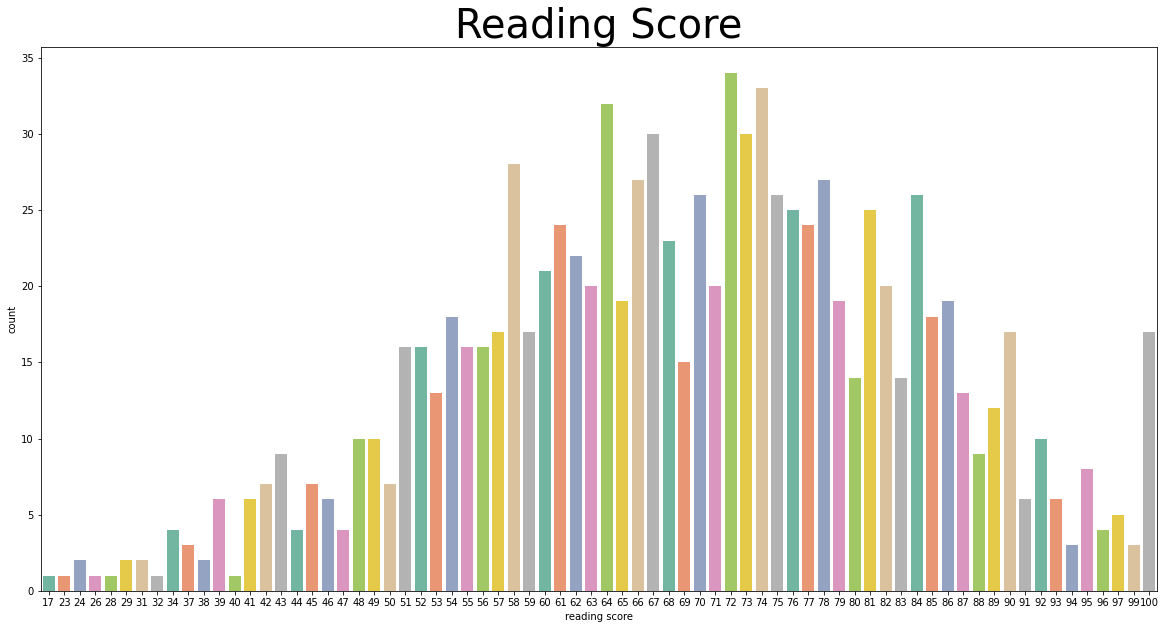

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(data['reading score'],palette='Set2')
plt.title('Reading Score',fontsize=40)

Text(0.5, 1.0, 'Writing Score')

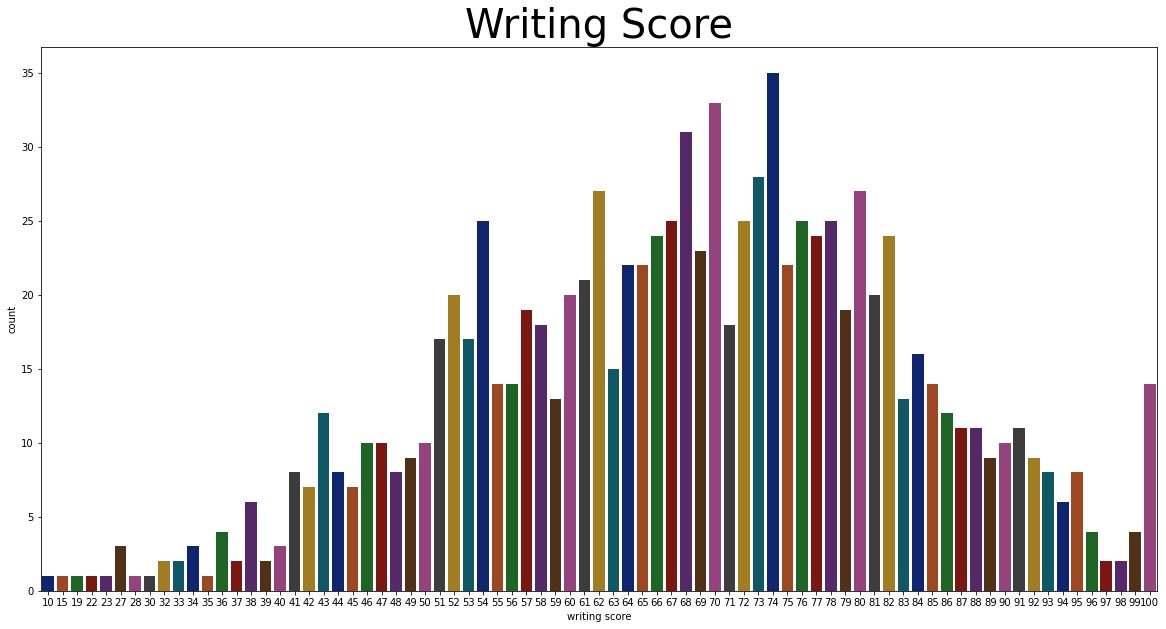

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(data['writing score'],palette='dark')
plt.title('Writing Score',fontsize=40)

So we infer that from the above plots, that the maximum number of students have scored 60-80 in all the three subjects and as also evident from the distplots

Text(0.5, 1.0, 'writing Score Distribution')

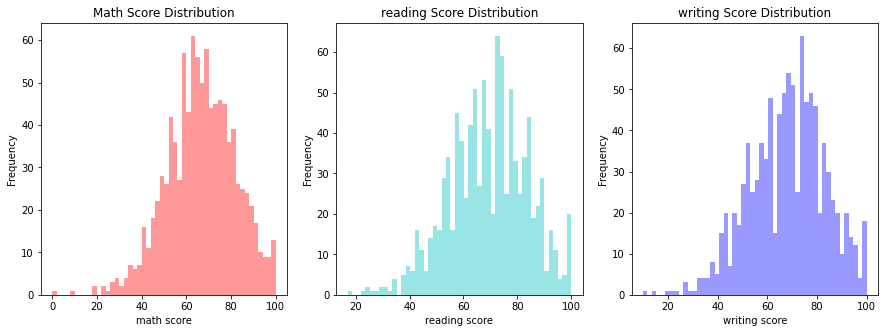

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(data['math score'], kde = False, color='r',bins = 50)
plt.ylabel('Frequency')
plt.title('Math Score Distribution')

plt.subplot(1,3,2)
sns.distplot(data['reading score'], kde = False, color='c', bins = 50)
plt.ylabel('Frequency')
plt.title('reading Score Distribution')

plt.subplot(1,3,3)
sns.distplot(data['writing score'], kde = False, color='b',bins = 50)
plt.ylabel('Frequency')
plt.title('writing Score Distribution')

Correlation between numerical data (Scores of Writing,Reading and Maths)

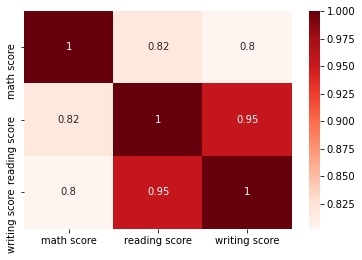

In [14]:
sns.heatmap(data.corr(),annot=True,cmap = 'Reds')
plt.show()

# Assigning Grades according to the Marks

In [15]:
data["percentage"] = round((data['math score']+data['reading score']+data['writing score'])/3,2)

In [16]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [17]:
def grade_it(score): 
    x = int(score/10)-3
    if x < 0:
        x = 0
    elif x > 6:
        x = 6 
    return ["Fail","F","E","D","C","B","A"][x]

#function to determine the grade attained according to the following criteria
#grading criteria: 100-90 - A, 89-80 - B, 79-70 - C, 69-60 - D, 59-50 - E, 49-40 - F, less than 40 - Fail 

In [18]:
data["grades"] = data.percentage.apply(grade_it)

In [19]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,C
1,female,group C,some college,standard,completed,69,90,88,82.33,B
2,female,group B,master's degree,standard,none,90,95,93,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,F
4,male,group C,some college,standard,none,76,78,75,76.33,C


To keep the original data intact we create a data frame 'data_g' and also added the percentage and grades column to 'data'

In [20]:
data_g = data.drop('grades',axis=1)
data_f = data_g.drop('percentage',axis=1)

In [21]:
data_f.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Exploratory Data Analysis

# Lets's see the proportion and distribution of the remaining variables


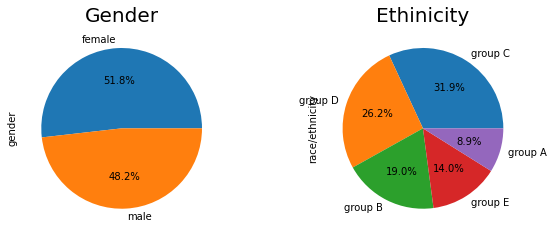

In [22]:
plt.figure(figsize=(9,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(121)
plt.title('Gender',fontsize = 20)
data['gender'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(122)
plt.title('Ethinicity',fontsize = 20)
data['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

plt.show()

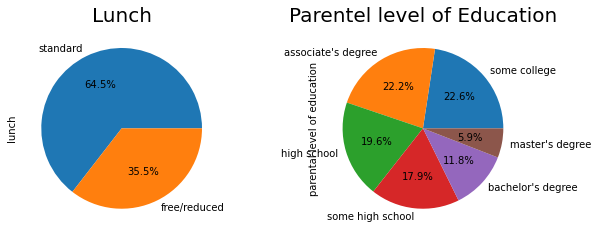

In [23]:
plt.figure(figsize=(9,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)

plt.subplot(121)
plt.title('Lunch',fontsize = 20)
data['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(122)
plt.title('Parentel level of Education',fontsize = 20)
data['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#Infereces and Observations

--The proportion of male and female are almost same

--Highest no. of students belong to Group C ethnicity

--Highest proportion of student has standard lunch

--Highest proportion of Parental level of education is high school

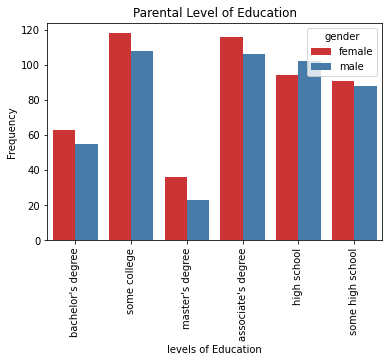

In [24]:
from matplotlib.pyplot import xticks
sns.countplot(x="parental level of education",hue = "gender", data=data,palette='Set1')
xticks(rotation=90)
plt.xlabel('levels of Education')
plt.ylabel('Frequency')
plt.title('Parental Level of Education')
plt.show()

Count plot for Parental Level of Education with respect to Gender

Text(0.5, 1.0, 'lunch')

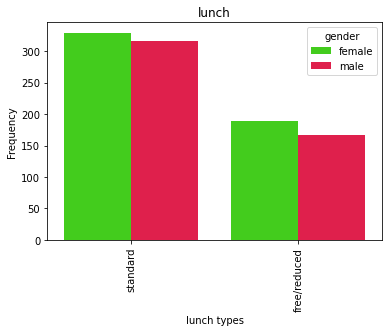

In [25]:
sns.countplot(x="lunch",hue = "gender", data= data,palette='prism')
xticks(rotation=90)
plt.xlabel('lunch types')
plt.ylabel('Frequency')
plt.title('lunch')

Countplot for Lunch types with respect to Gender

Text(0.5, 1.0, 'lunch based on parental level of education')

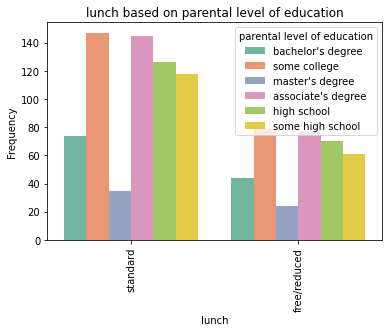

In [26]:
sns.countplot(x="lunch",hue = "parental level of education", data= data,palette='Set2')
xticks(rotation=90)
plt.xlabel('lunch')
plt.ylabel('Frequency')
plt.title('lunch based on parental level of education')

Countplot for Lunch with respect to Parental Level of Education

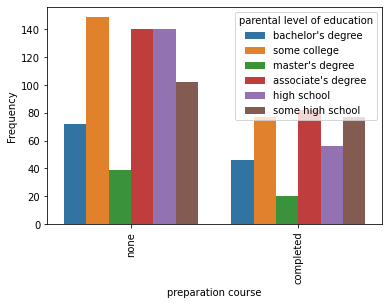

In [27]:
sns.countplot(x="test preparation course",hue= "parental level of education", data= data)
xticks(rotation=90)
plt.xlabel('preparation course')
plt.ylabel('Frequency')

plt.show()

Countplot for whether a student has taken an Test Preparation course with respect to Parental Level of Education

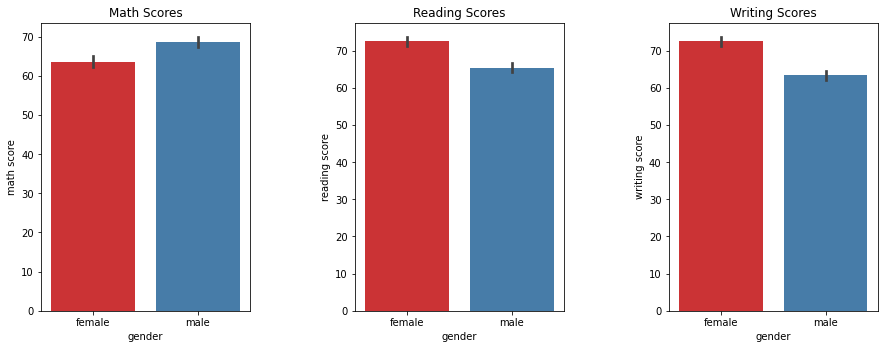

In [28]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=data,palette='Set1')
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=data,palette='Set1')
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=data,palette='Set1')
plt.show()

Test marks in different subjects with respect to Gender

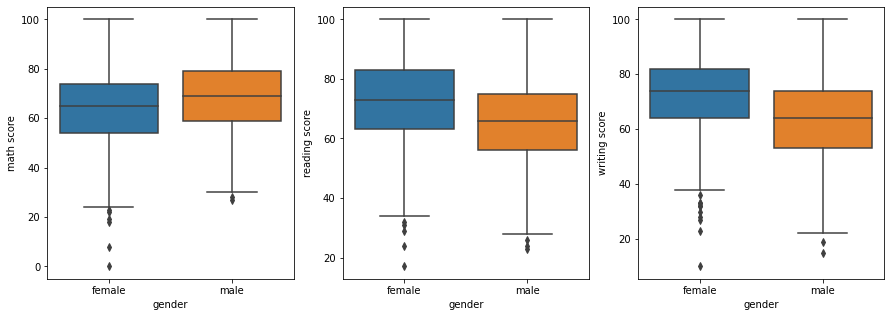

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=data['gender'],y=data['math score'])

plt.subplot(1,3,2)
sns.boxplot(x=data['gender'],y=data['reading score'])

plt.subplot(1,3,3)
sns.boxplot(x=data['gender'],y=data['writing score'])

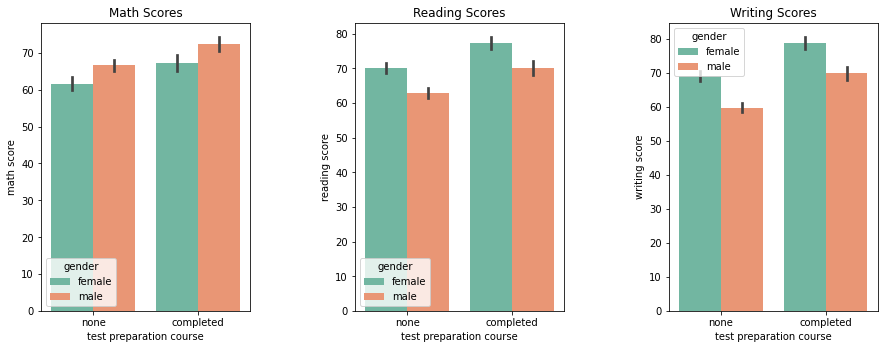

In [30]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=data,palette='Set2')
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=data,palette='Set2')
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=data,palette='Set2')
plt.show()

So the students (male and female) who completed the test preparation course scored higher in all three subjects.

Text(0.5, 0, 'parents level of education')

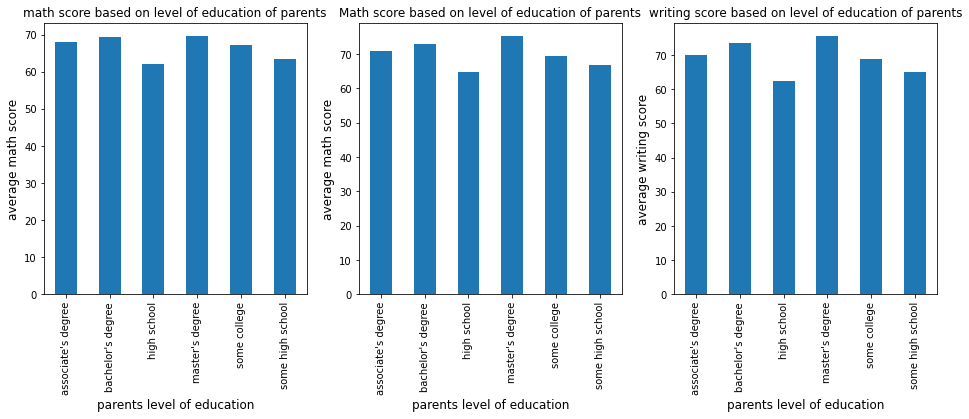

In [31]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
day_wise=data.groupby('parental level of education')['math score'].mean().plot.bar()
plt.title("math score based on level of education of parents")
plt.ylabel('average math score', fontsize=12)
plt.xlabel('parents level of education', fontsize=12)

plt.subplot(1,3,2)
day_wise=data.groupby('parental level of education')['reading score'].mean().plot.bar()
plt.title("Math score based on level of education of parents")
plt.ylabel('average math score', fontsize=12)
plt.xlabel('parents level of education', fontsize=12)

plt.subplot(1,3,3)
day_wise=data.groupby('parental level of education')['writing score'].mean().plot.bar()
plt.title("writing score based on level of education of parents")
plt.ylabel('average writing score', fontsize=12)
plt.xlabel('parents level of education', fontsize=12)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

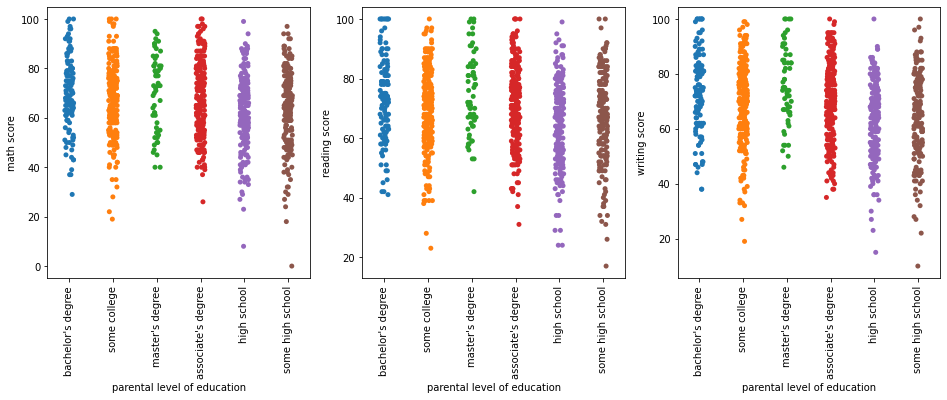

In [32]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.stripplot(x="parental level of education",y='math score',data=data)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.stripplot(x="parental level of education",y='reading score',data=data)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.stripplot(x="parental level of education",y='writing score',data=data)
plt.xticks(rotation=90)

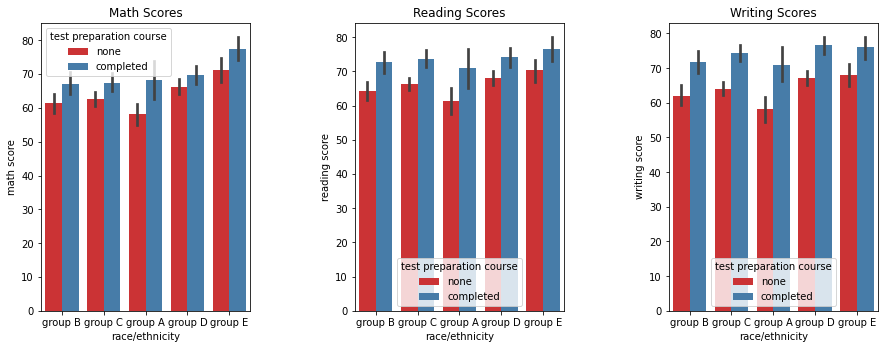

In [33]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="race/ethnicity", y="math score", hue="test preparation course", data=data,palette='Set1')
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="test preparation course", y="reading score", x="race/ethnicity", data=data,palette='Set1')
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="test preparation course", y="writing score", x= 'race/ethnicity',data=data,palette='Set1')

plt.show()

Highest number of Students who belongs to Group E has completed the test preperation course in Math and Reading and scored highest.

Highest number of Students who belongs to Group D and E has completed the test preperation course in Writing and scored highest.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

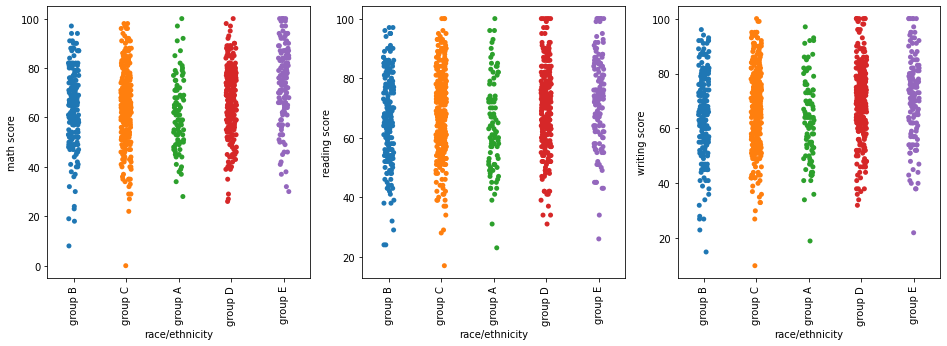

In [34]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.stripplot(x="race/ethnicity",y='math score',data=data)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.stripplot(x="race/ethnicity",y='reading score',data=data)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.stripplot(x="race/ethnicity",y='writing score',data=data)
plt.xticks(rotation=90)

Text(0.5, 0, 'test preparation course')

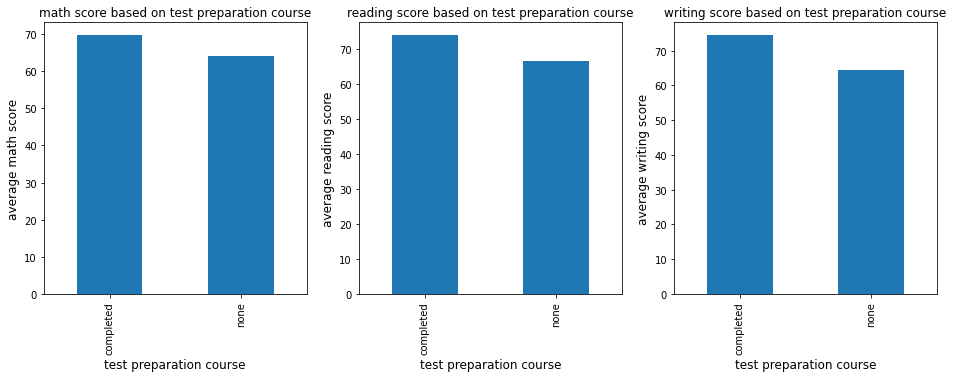

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
day_wise=data.groupby('test preparation course')['math score'].mean().plot.bar()
plt.title("math score based on test preparation course")
plt.ylabel('average math score', fontsize=12)
plt.xlabel('test preparation course', fontsize=12)

plt.subplot(1,3,2)
day_wise=data.groupby('test preparation course')['reading score'].mean().plot.bar()
plt.title("reading score based on test preparation course")
plt.ylabel('average reading score', fontsize=12)
plt.xlabel('test preparation course', fontsize=12)

plt.subplot(1,3,3)
day_wise=data.groupby('test preparation course')['writing score'].mean().plot.bar()
plt.title("writing score based on test preparation course")
plt.ylabel('average writing score', fontsize=12)
plt.xlabel('test preparation course', fontsize=12)

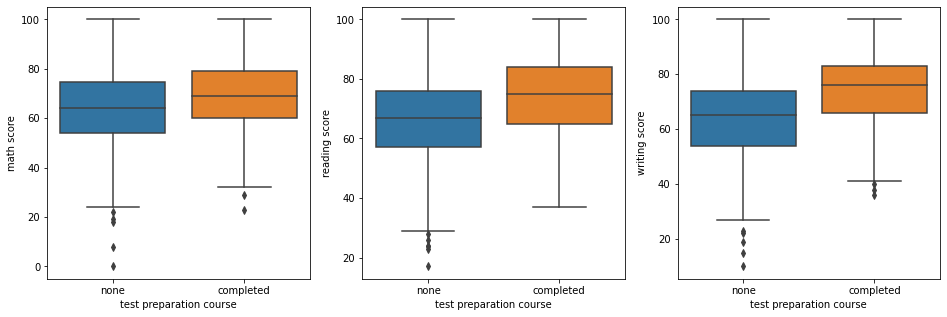

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(x=data['test preparation course'],y=data['math score'])

plt.subplot(1,3,2)
sns.boxplot(x=data['test preparation course'],y=data['reading score'])

plt.subplot(1,3,3)
sns.boxplot(x=data['test preparation course'],y=data['writing score'])

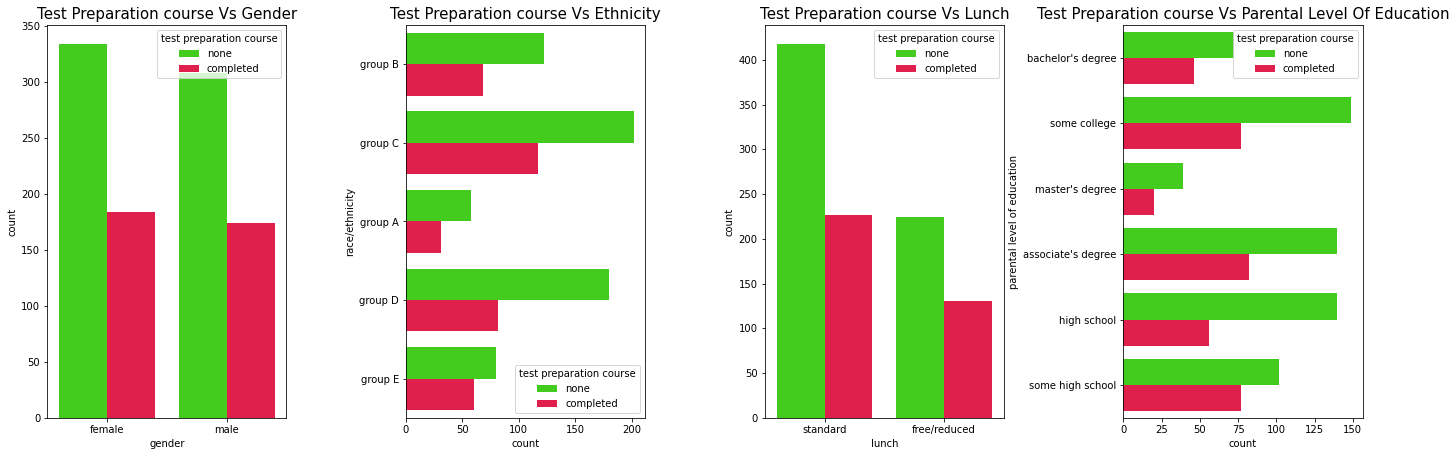

In [37]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Test Preparation course Vs Gender',fontsize = 15)
sns.countplot(hue="test preparation course", x="gender", data=data,palette='prism')

plt.subplot(254)
plt.title('Test Preparation course Vs Parental Level Of Education',fontsize = 15)
sns.countplot(hue="test preparation course", y="parental level of education", data=data,palette='prism')

plt.subplot(253)
plt.title('Test Preparation course Vs Lunch',fontsize = 15)
sns.countplot(hue="test preparation course", x="lunch", data=data,palette='prism')

plt.subplot(252)
plt.title('Test Preparation course Vs Ethnicity',fontsize = 15)
sns.countplot(hue="test preparation course", y="race/ethnicity", data=data,palette='prism')

plt.show()

Observations:

Most of the students have not completed the test preparation course.

Highest number Students who belong to group C ethinicity have completed the test preparation course.

Standard lunch students have completed the test preparation course

Students whos parental level of education is 'some college, 'associate's degree', and high school have completed the test preparation course.

We can also say that the students who belongs to Group E ethincity has scored more marks in all three subjectes even though they have not completed the test preparation course.

Now, lets see the relation between the remaining variables

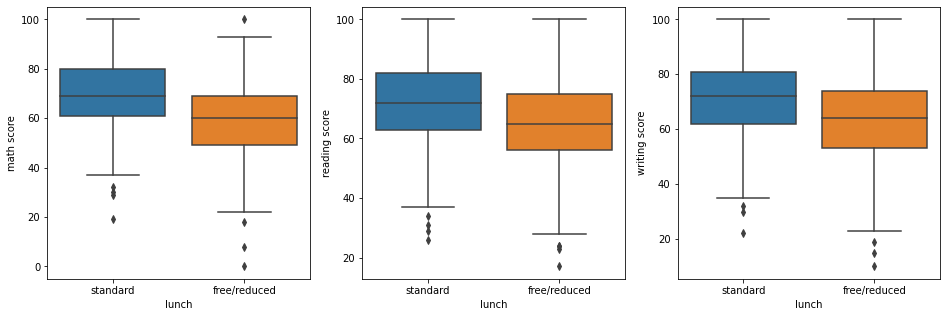

In [38]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(x=data['lunch'],y=data['math score'])

plt.subplot(1,3,2)
sns.boxplot(x=data['lunch'],y=data['reading score'])

plt.subplot(1,3,3)
sns.boxplot(x=data['lunch'],y=data['writing score'])

<Figure size 1080x360 with 0 Axes>

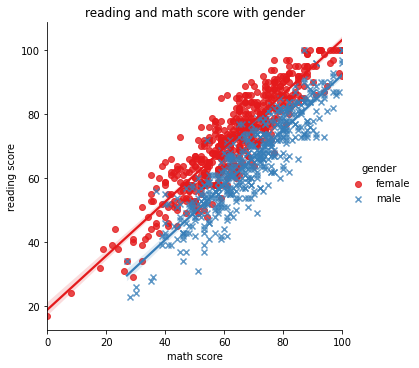

In [39]:
plt.figure(figsize=(15,5))
sns.lmplot(x="math score", y="reading score", hue="gender", data=data_f, markers=["o", "x"], palette="Set1")
plt.title('reading and math score with gender')
plt.show()

<Figure size 1080x360 with 0 Axes>

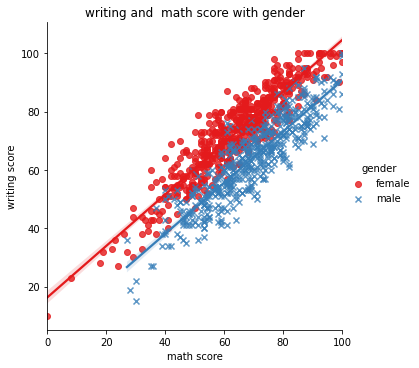

In [40]:
plt.figure(figsize=(15,5))
sns.lmplot(x="math score", y="writing score", hue="gender", data=data_f, markers=["o", "x"], palette="Set1")
plt.title('writing and  math score with gender')
plt.show()

<Figure size 1080x360 with 0 Axes>

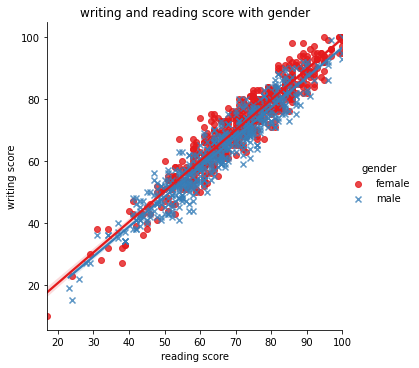

In [41]:
plt.figure(figsize=(15,5))
sns.lmplot(x="reading score", y="writing score", hue="gender", data=data_f, markers=["o", "x"], palette="Set1")
plt.title('writing and reading score with gender')
plt.show()

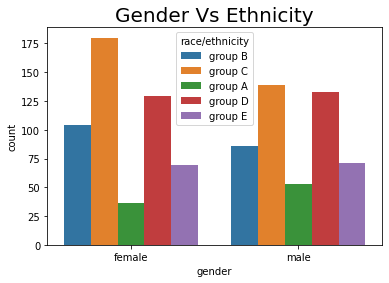

In [42]:
plt.title('Gender Vs Ethnicity',fontsize = 20)
sns.countplot(x="gender", hue="race/ethnicity", data=data_f)
plt.show()

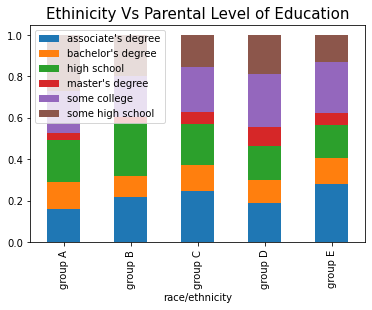

In [43]:
pr=pd.crosstab(data['race/ethnicity'],data['parental level of education'],normalize=0)

pr.plot.bar(stacked=True,legend=True)
plt.legend(loc='upper left')
plt.title('Ethinicity Vs Parental Level of Education',fontsize = 15)
plt.show()

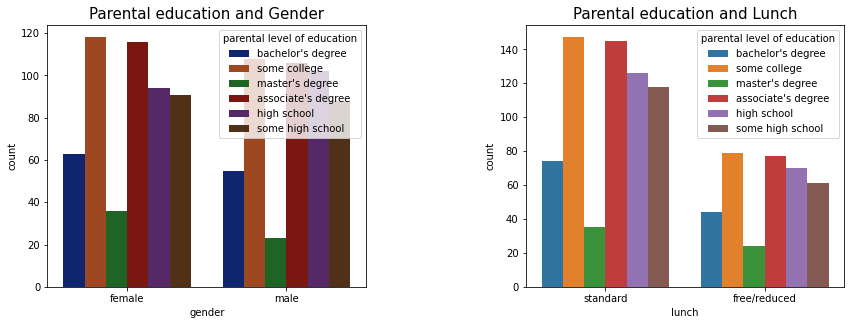

In [44]:
plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Parental education and Gender',fontsize=15)
sns.countplot(hue="parental level of education", x="gender", data=data,palette='dark')
plt.subplot(252)
plt.title('Parental education and Lunch',fontsize=15)
sns.countplot(hue="parental level of education", x="lunch", data=data)

plt.show()

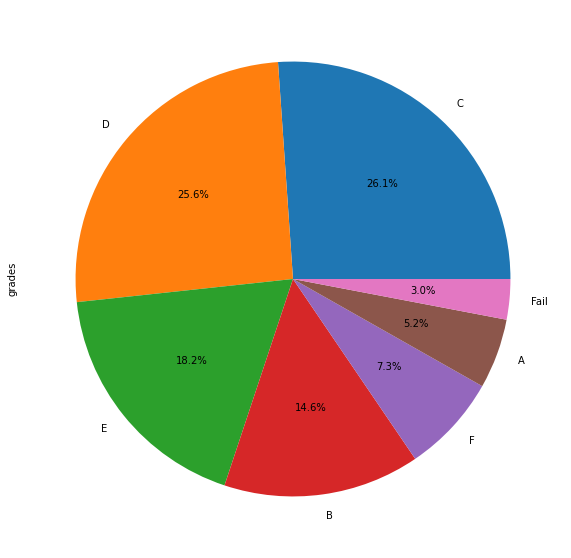

In [45]:
plt.figure(figsize=(10,10))
data['grades'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Pie chart for the percentage of Grades

Most of the students got B and C grade.

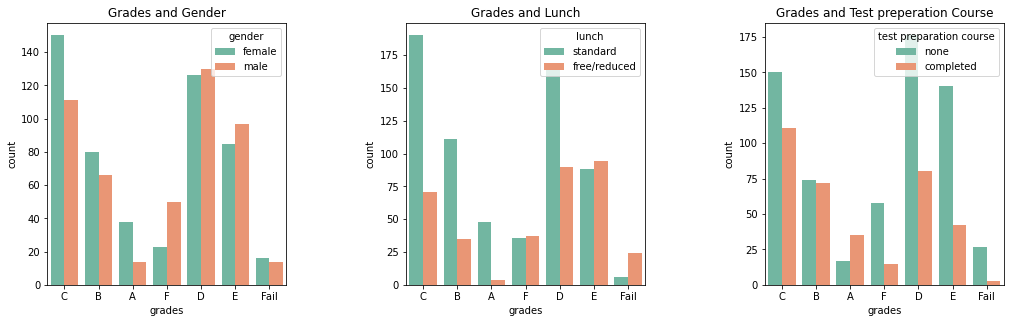

In [46]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Grades and Gender')
sns.countplot(hue="gender", x="grades", data=data,palette='Set2')

plt.subplot(252)
plt.title('Grades and Lunch')
sns.countplot(hue="lunch", x="grades", data=data,palette='Set2')

plt.subplot(253)
plt.title('Grades and Test preperation Course')
sns.countplot(hue="test preparation course", x="grades", data=data,palette='Set2')

plt.show()

How Grades varies different aspects of the data

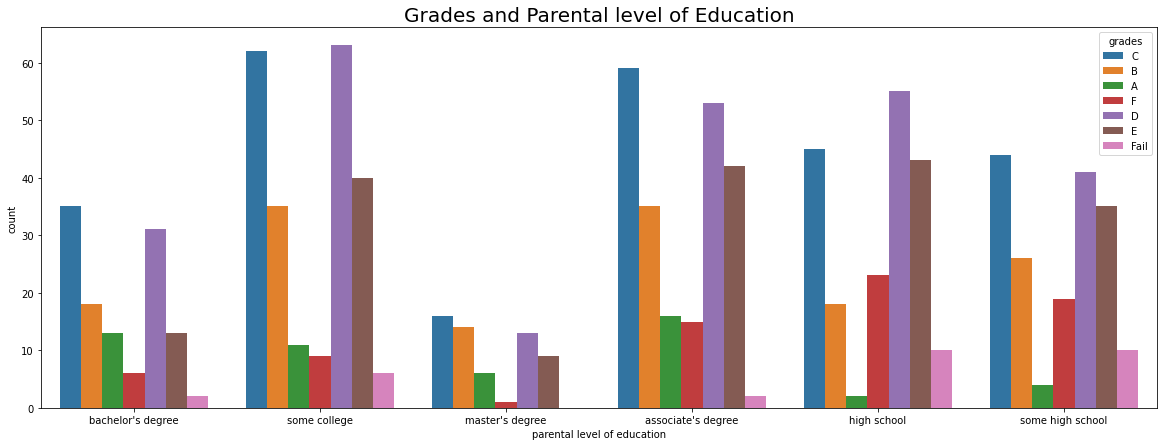

In [47]:
plt.figure(figsize=(20,7))
plt.title('Grades and Parental level of Education',fontsize=20)
sns.countplot(x="parental level of education", hue="grades", data=data)
plt.show()

countplot on how Grades varies with Parental Level of Education

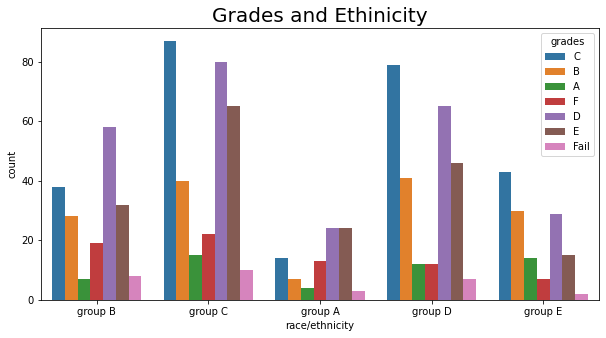

In [48]:
plt.figure(figsize=(10,5))
plt.title('Grades and Ethinicity',fontsize=20)
sns.countplot(x="race/ethnicity", hue="grades", data=data)

This countplot helps us see how the ethinicity varies with the grades

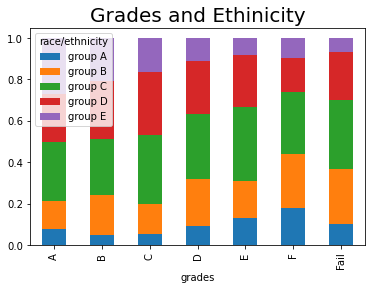

In [49]:
gr=pd.crosstab(data['grades'],data['race/ethnicity'],normalize=0)  
gr.plot.bar(stacked=True)
plt.title('Grades and Ethinicity',fontsize=20)
plt.show()

The bar plot for how Grades varies with Ethnicity

# Inferences
#searched for missing value in each column
#maximum number of students have socred in range 60 - 80 in all three subjects.
#Most of the students belong to Group C
#Highest proportion of the students have standard lunch
#Added percentage and grades
#Most of the students got B and C Grade.
#Exploratory Data Analysis based on one aspect of the data with respect to another aspect of the data 
#Analysis on Grade

# Thank You!